In [3]:
# Import initial necessary libraries
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import os
from anthropic import Anthropic
from dotenv import load_dotenv
import seaborn as sns
import matplotlib.pyplot as plt
import io
import base64

In [4]:
# Load dataset
df = pd.read_csv('Clicked Ads Dataset.csv', index_col=0)
df.sample(10)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad,city,province,category
52,33.33,45,373450770.0,193.58,Laki-Laki,1/17/2016 9:31,Yes,Jakarta Pusat,Daerah Khusus Ibukota Jakarta,House
968,45.08,38,247444820.0,125.27,Perempuan,3/27/2016 8:32,Yes,Bekasi,Jawa Barat,Fashion
234,37.32,50,397145980.0,199.25,Laki-Laki,3/30/2016 23:40,Yes,Jakarta Timur,Daerah Khusus Ibukota Jakarta,Finance
403,87.23,29,357105770.0,202.12,Perempuan,3/26/2016 19:54,No,Palembang,Sumatra Selatan,Otomotif
278,81.37,26,371346080.0,156.48,Laki-Laki,2/15/2016 12:25,No,Makassar,Sulawesi Selatan,Health
118,84.45,50,208094530.0,207.18,Perempuan,7/13/2016 4:10,Yes,Surabaya,Jawa Timur,Fashion
496,81.10,29,428204490.0,216.49,Laki-Laki,7/8/2016 3:47,No,Bekasi,Jawa Barat,Furniture
963,60.75,42,488430250.0,247.05,Laki-Laki,2/19/2016 13:26,No,Medan,Sumatra Utara,Electronic
128,70.41,27,466327470.0,223.03,Perempuan,4/4/2016 21:30,No,Malang,Jawa Timur,Otomotif
77,82.73,33,381790920.0,238.99,Laki-Laki,5/20/2016 21:31,No,Tangerang,Banten,Bank


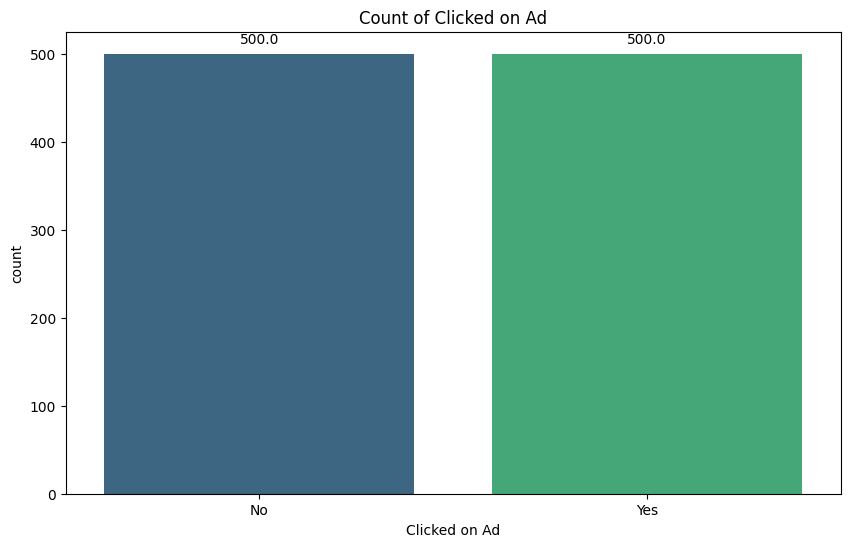

In [5]:
# Check what the plot looks like
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Clicked on Ad', palette='viridis')
plt.title('Count of Clicked on Ad')

# Add annotations on top of each bar
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', 
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='center', 
                      xytext=(0, 10), 
                      textcoords='offset points')

# Show the plot
plt.show()

In [7]:
## Create a simple countplot and analyze it using GPT-4 Vision
def analyze_chart_with_claude(plt_figure, analysis_prompt=None, max_tokens=1000):
    """
    Analyze a matplotlib figure using Claude's vision capabilities
    
    Args:
        plt_figure: A matplotlib figure object to analyze
        analysis_prompt (str, optional): Custom prompt for analysis
        max_tokens (int): Maximum number of tokens in the response
        
    Returns:
        str: Claude's analysis of the chart
    """
    # Load environment variables and initialize client
    load_dotenv()
    client = Anthropic(api_key=os.environ.get("ANTHROPIC_KEY"))
    
    # Save plot to buffer
    buffer = io.BytesIO()
    plt_figure.savefig(buffer, format='png')
    buffer.seek(0)
    
    # Convert to base64
    image_base64 = base64.b64encode(buffer.getvalue()).decode('utf-8')
    
    # Default analysis prompt if none provided
    if analysis_prompt is None:
        analysis_prompt = "Please analyze this chart and explain what it shows. Include specific numbers and any interesting patterns or insights you observe."
    
    # Create the message with image
    message = client.messages.create(
        model="claude-3-sonnet-20240229",
        max_tokens=max_tokens,
        messages=[{
            "role": "user",
            "content": [
                {
                    "type": "text",
                    "text": analysis_prompt
                },
                {
                    "type": "image",
                    "source": {
                        "type": "base64",
                        "media_type": "image/png",
                        "data": image_base64
                    }
                }
            ]
        }]
    )
    
    # Clean up
    buffer.close()
    
    return message.content[0].text

# Example usage
if __name__ == "__main__":
    # Create a sample plot
    plt.figure(figsize=(10, 6))
    # Assuming you have a DataFrame 'df' with 'Clicked on Ad' column
    sns.countplot(data=df, x='Clicked on Ad', palette='viridis')
    plt.title('Count of Clicked on Ad')
    
    # Add annotations
    for p in plt.gca().patches:
        plt.gca().annotate(f'{p.get_height()}', 
                          (p.get_x() + p.get_width() / 2., p.get_height()),
                          ha='center', va='center', 
                          xytext=(0, 10), 
                          textcoords='offset points')
    
    # Get the analysis
    analysis = analyze_chart_with_claude(plt.gcf())
    print("\nChart Analysis Response:")
    print(analysis)
    
    # Clean up
    plt.close()


Chart Analysis Response:
The chart shows the count or frequency of users who clicked on an ad or not. It has two bars representing the two possible outcomes: "No" (not clicking on the ad) and "Yes" (clicking on the ad).

The bar for "No" shows a count of 500.0, which indicates that 500 users or instances did not click on the ad.

The bar for "Yes" also has a count of 500.0, meaning that an equal number of 500 users or instances clicked on the ad.

This chart reveals an interesting pattern - the count or frequency of users who clicked on the ad is exactly the same as those who did not click on it. In other words, the data is perfectly balanced or split between the two outcomes.

Such a balanced distribution could suggest that the ad campaign or promotion had a moderate level of success, with an equal number of users being interested (clicking) and not interested (not clicking). However, more context would be needed to fully interpret the implications of this balanced split.
